<a href="https://colab.research.google.com/github/nicolas-errandonea/TFG/blob/TFGcodes/Boots_kelly_Pinnacle_betts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import random
drive.mount('/content/gdrive', force_remount=True)
path1 = "/content/gdrive/My Drive/SerieA/seriea17-18.csv"
path2 = "/content/gdrive/My Drive/SerieA/seriea18-19.csv"
path3 = "/content/gdrive/My Drive/SerieA/seriea19-20.csv"
path4 = "/content/gdrive/My Drive/SerieA/seriea20-21.csv"
path5 = "/content/gdrive/My Drive/SerieA/seriea21-22.csv"
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)

Mounted at /content/gdrive


In [ ]:
premier_data = pd.concat([df1, df2,df3,df4,df5])
premier_data=premier_data.reset_index(drop=True)

In [ ]:
premier_data=premier_data.iloc[::-1]
premier_data=premier_data.reset_index(drop=True)

In [ ]:
premier_data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,I1,22/05/2022,Venezia,Cagliari,0,0,D,0,0,D,...,2.16,1.00,1.87,2.03,1.85,2.06,1.97,2.22,1.79,2.09
1,I1,22/05/2022,Salernitana,Udinese,0,4,A,0,3,A,...,2.35,-0.50,1.89,2.01,1.89,2.04,1.93,2.04,1.89,1.99
2,I1,22/05/2022,Sassuolo,Milan,0,3,A,0,3,A,...,2.63,1.25,2.04,1.86,2.06,1.87,2.06,2.01,1.98,1.89
3,I1,22/05/2022,Inter,Sampdoria,3,0,H,0,0,D,...,3.71,-2.50,2.02,1.88,1.99,1.92,2.07,2.02,1.99,1.88
4,I1,22/05/2022,Spezia,Napoli,0,3,A,0,3,A,...,2.49,0.75,1.97,1.93,1.99,1.92,2.12,1.98,1.97,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,I1,20/08/17,Crotone,Milan,0,3,A,0,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1896,I1,20/08/17,Bologna,Torino,1,1,D,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1897,I1,20/08/17,Atalanta,Roma,0,1,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1898,I1,19/08/17,Verona,Napoli,1,3,A,0,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
premier_data = premier_data.drop(labels=[176,722,724], axis=0)

In [ ]:
path = "/content/gdrive/My Drive/SerieA/serieA_data.csv"
df = pd.read_csv(path)

In [ ]:
df = df.drop(labels=[176,722,724], axis=0)

In [ ]:
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import numpy
from sklearn import metrics
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import statistics
import math
import scipy.optimize as spo
import scipy

In [ ]:
h_result=[]
d_result=[]
a_result=[]
for i in df.index:
  if(df.FTR[i]==1):
    h_result.append(1)
    d_result.append(0)
    a_result.append(0)
  if(df.FTR[i]==2):
    h_result.append(0)
    d_result.append(1)
    a_result.append(0)
  if(df.FTR[i]==3):
    h_result.append(0)
    d_result.append(0)
    a_result.append(1)  



In [ ]:
df['h_result']=h_result
df['d_result']=d_result
df['a_result']=a_result



In [ ]:
df2=df.copy()
cols_to_drop = ['Date','HomeTeam','AwayTeam','FTR', 'HR','AR','HR_A','AR_A','HTAG','HTHG','HTAG_A','HTHG_A','h_result','d_result','a_result' ]


df2.drop( columns = cols_to_drop, inplace = True)

In [ ]:
df['B365H']=premier_data.PSH
df['B365D']=premier_data.PSD
df['B365A']=premier_data.PSA

In [ ]:
def test3(df,df2):
  prediction_cols=['FTR']
  x_train = df2[380:]      
  y_train = df[380:][prediction_cols]
  x_test = df2[0:380]     
  y_test = df[0:380][prediction_cols]
  return x_train,y_train,x_test,y_test

In [ ]:
def batch_creator(element,z):
  batch=[]
  for j in range(100):
    batch.append(element[j][z])
  return batch

In [ ]:
def  bootstrap_creator( x_train,y_train,x_test,y_test):
  element=[]
  for i in range(100):
    base_modell = RandomForestClassifier(n_estimators = 4000,bootstrap=True ,max_depth=140,max_samples=None,max_features='auto',min_samples_leaf=10,min_samples_split=9,warm_start=True,ccp_alpha=0.005,min_weight_fraction_leaf=0.05,max_leaf_nodes=100)

    base_modell.fit(x_train, y_train)
    y_pred = base_modell.predict(x_test)
    prob_y_test=base_modell.predict_proba(x_test)
    element.append(prob_y_test)
  real_list=[]
  for z in range(380):
    batch=batch_creator(element,z)
    real_list.append(batch)
  return real_list 

In [ ]:
def f(xyz,p,v):
  import math
  a=xyz[0]
  b=xyz[1]
  c=xyz[2]
  function=p[0]*math.log(v[0]*a)+p[1]*math.log(v[1]*b)+p[2]*math.log(v[2]*c)
  return -function

In [ ]:
def table_creator(df,df2,y_test,prob_y_test,num1):
 if(num1==0):
  data_kelly=df[1140:1520][['B365H','B365D','B365A','h_result','d_result','a_result']]
 if(num1==1):
  data_kelly=df[760:1140][['B365H','B365D','B365A','h_result','d_result','a_result']]
 if(num1==2):
  data_kelly=df[380:760][['B365H','B365D','B365A','h_result','d_result','a_result']]
 if(num1==3):
  data_kelly=df[0:380][['B365H','B365D','B365A','h_result','d_result','a_result']]
 home_prob=[]
 draw_prob=[]
 away_prob=[]
 for j in range(len(y_test.index)):
   home_prob.append(prob_y_test[j][0])
   draw_prob.append(prob_y_test[j][1])
   away_prob.append(prob_y_test[j][2])
 data_kelly['home_prob']=home_prob
 data_kelly['draw_prob']=draw_prob
 data_kelly['away_prob']=away_prob

 h_bet=[]
 d_bet=[]
 a_bet=[]
 for j in data_kelly.index:
   v=[data_kelly.B365H[j],data_kelly.B365D[j],data_kelly.B365A[j]]
   p=[data_kelly.home_prob[j],data_kelly.draw_prob[j],data_kelly.away_prob[j]]
   xyz_start=[1.0,0.0,0.0]
   bnds=((1/100,1),(1/100,1),(1/100,1))
   cons=({'type':'eq','fun':lambda xyz: xyz[0]+xyz[1]+xyz[2]-1})
   result=spo.minimize(f,xyz_start,args=(p,v),options={"disp":True},constraints=cons,bounds=bnds)
   h_bet.append(result.x[0])
   d_bet.append(result.x[1])
   a_bet.append(result.x[2])
 data_kelly['h_bet']=h_bet
 data_kelly['d_bet']=d_bet
 data_kelly['a_bet']=a_bet
 reality=[]
 for i in data_kelly.index:
  prod=[data_kelly.B365H[i]*data_kelly.h_bet[i],data_kelly.B365D[i]*data_kelly.d_bet[i],data_kelly.B365A[i]*data_kelly.a_bet[i]]
  scalar=prod[0]*data_kelly.h_result[i]+prod[1]*data_kelly.d_result[i]+prod[2]*data_kelly.a_result[i]
  reality.append(scalar)
 data_kelly['reality']=reality
 data_kelly=data_kelly.reset_index()
 data_kelly = data_kelly.drop('index', 1)
 return data_kelly

In [ ]:
def table_creator_bootstrap(real_list,data_kelly):
   param_mean=[]
   param_max=[]
   param_cuant=[]
   for j in range(380):
     cuant_boots=[]
     for z in range(1000):
       n=random.randint(0,99)
       m=random.randint(0,99)
       v=[data_kelly.B365H[j],data_kelly.B365D[j],data_kelly.B365A[j]]
       p=real_list[j][n]
       xyz_start=[1.0,0.0,0.0]
       bnds=((0,1),(0,1),(0,1))
       cons=({'type':'eq','fun':lambda xyz: xyz[0]+xyz[1]+xyz[2]-1})
       result1=spo.minimize(f,xyz_start,args=(p,v),options={"disp":True},constraints=cons,bounds=bnds)
       p=real_list[j][m]
       result2=spo.minimize(f,xyz_start,args=(p,v),options={"disp":True},constraints=cons,bounds=bnds)
       value=(result1.x[0]-result2.x[0])*(result1.x[0]-result2.x[0])+(result1.x[1]-result2.x[1])*(result1.x[1]-result2.x[1])+(result1.x[2]-result2.x[2])*(result1.x[2]-result2.x[2])
       value=100*value
       cuant_boots.append(value)
     def_value=numpy.quantile(cuant_boots,0.5)
     param_mean.append(def_value)
   data_kelly['w_value_mean']=param_mean
   return data_kelly

In [ ]:
def vect_results(money_earned,num1,defin,boot,year,typeof,maxuse,mean,sd,loss):
  if(num1==0):
   year.append('First_season')
  if(num1==1):
   year.append('Second_season')
  if(num1==2):
   year.append('Third_season')
  if(num1==3):
    year.append('season_21-22')
  if(defin==0):
    maxuse.append('mean_constraint')
  if(defin==1):
    maxuse.append('max:constraint')
  if(boot==0):
    typeof.append('frac_kelly')
  if(boot==1):
    typeof.append('max_boots')
  if(boot==2):
    typeof.append('mean_boots_kelly')
  if(boot==3):
    typeof.append('cuant_boots')
  mean.append(statistics.mean(money_earned))
  fracaso=0
  for z in money_earned:
   if(z<100):
    fracaso=fracaso+1
  loss.append(fracaso/10000)
  sd.append(numpy.std(money_earned))
  return year,typeof,maxuse,mean,sd,loss
  

In [ ]:
def boots_kelly_function_def(data_kelly,num1,year,typeof,maxuse,mean,sd,loss):
 money_earned_mean=[]
 import math
 for z in range(10000):
   kelly=data_kelly.sample(n=350)
   kelly=kelly.reset_index()
   kelly =kelly.drop('index', 1)
   w=100
   for j in kelly.index:
      if(kelly.B365H[j]*kelly.h_bet[j]*kelly.home_prob[j]+kelly.B365D[j]*kelly.d_bet[j]*kelly.draw_prob[j]+kelly.B365A[j]*kelly.a_bet[j]*kelly.away_prob[j]>1.05):
         p=scipy.stats.percentileofscore(kelly.w_value_mean,kelly.w_value_mean[j] , 'strict')/100
         w=(kelly.reality[j])*w/(7*(2+p)) +w*(1-1/(7*(2+p)))
   money_earned_mean.append(w)
 year,typeof,maxuse,mean,sd,loss=vect_results(money_earned_mean,num1,0,2,year,typeof,maxuse,mean,sd,loss)
 return year,typeof,maxuse,mean,sd,loss,money_earned_mean


In [ ]:
def kelly_function_def(data_kelly,num1,year,typeof,maxuse,mean,sd,loss):
 money_earned=[]
 import math
 for z in range(10000):
   kelly=data_kelly.sample(n=350)
   kelly=kelly.reset_index()
   kelly =kelly.drop('index', 1)
   w=100
   for j in kelly.index:
      if(kelly.B365H[j]*kelly.h_bet[j]*kelly.home_prob[j]+kelly.B365D[j]*kelly.d_bet[j]*kelly.draw_prob[j]+kelly.B365A[j]*kelly.a_bet[j]*kelly.away_prob[j]>1.05):
           w=(kelly.reality[j])*w/(15) +w*(1-1/15)
   money_earned.append(w)
 year,typeof,maxuse,mean,sd,loss=vect_results(money_earned,num1,0,0,year,typeof,maxuse,mean,sd,loss)
 return year,typeof,maxuse,mean,sd,loss,money_earned

In [ ]:
def kelly_function_(data_kelly,num1,year,typeof,maxuse,mean,sd,loss):
 money_earned=[]
 import math
 for z in range(10000):
   kelly=data_kelly.sample(n=350)
   kelly=kelly.reset_index()
   kelly =kelly.drop('index', 1)
   w=100
   for j in kelly.index:
      if(max(kelly.B365H[j]*kelly.h_bet[j],kelly.B365D[j]*kelly.d_bet[j],kelly.B365A[j]*kelly.a_bet[j])>1):
           w=(kelly.reality[j])*w/(15) +w*(1-1/15)
   money_earned.append(w)
 year,typeof,maxuse,mean,sd,loss=vect_results(money_earned,num1,1,0,year,typeof,maxuse,mean,sd,loss) 
 return year,typeof,maxuse,mean,sd,loss,money_earned

In [ ]:
def evaluate(model, x_test, y_test):
  result=(y_test.to_numpy())
  y_pred = model.predict(x_test)
  hits=0
  total=0
  for i in range(len(y_pred)):
    total=total+1
    if((y_pred[i]-result[i])==[0]):
      hits=hits+1
  print(hits/total)
  accuracy=hits/total
  return accuracy

In [ ]:
import random
year=[]
typeof=[]
maxuse=[]
mean=[]
sd=[]
loss=[]

for i in range(1):
 #num1 = random.randint(0, 3)
 num1=3
 if(num1==3):
   x_train,y_train,x_test,y_test=test3(df,df2)
 real_list=bootstrap_creator( x_train,y_train,x_test,y_test)

  
 base_modell = RandomForestClassifier(n_estimators = 1388,bootstrap=True ,max_depth=64,max_samples=None,max_features='auto',min_samples_leaf=6,min_samples_split=12,warm_start=False,ccp_alpha=0.005)
 base_modell.fit(x_train, y_train)
 y_pred = base_modell.predict(x_test)
 prob_y_test=base_modell.predict_proba(x_test)
 base_accuracy = evaluate(base_modell, x_test, y_test)
 print(base_accuracy)
 data_kelly=table_creator(df,df2,y_test,prob_y_test,num1)
 data_kelly=table_creator_bootstrap(real_list,data_kelly)
 year,typeof,maxuse,mean,sd,loss,money_earned_mean=boots_kelly_function_def(data_kelly,num1,year,typeof,maxuse,mean,sd,loss)
 year,typeof,maxuse,mean,sd,loss,money_earned_goodk=kelly_function_def(data_kelly,num1,year,typeof,maxuse,mean,sd,loss)
 year,typeof,maxuse,mean,sd,loss,money_earned_badk=kelly_function_(data_kelly,num1,year,typeof,maxuse,mean,sd,loss)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was pas

0.5342105263157895
0.5342105263157895
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.6864661983625719
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.6978748220536937
            Iterations: 4
            Function evaluations: 20
            Gradient evaluations: 4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.6834257633806555
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.739215987643348
            Iterations: 9
            Function evaluations: 48
            Gradient evaluations: 9
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.6807776735327999
            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Se han truncado las últimas 5000 líneas del flujo de salida.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.6858901623833427
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.6857227980314714
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.6854514149334124
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.685769311247766
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.684980

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [ ]:
data_kelly

,B365H,B365D,B365A,h_result,d_result,a_result,home_prob,draw_prob,away_prob,h_bet,d_bet,a_bet,reality,w_value_mean
0,4.83,4.25,1.70,0,1,0,0.222739,0.269466,0.507795,0.246048,0.311516,0.442436,1.323941,0.005539
1,1.69,4.34,4.79,0,0,1,0.475301,0.282066,0.242633,0.373615,0.342239,0.284146,1.361058,0.007638
2,6.84,5.00,1.46,0,0,1,0.165292,0.220343,0.614366,0.189552,0.247553,0.562896,0.821828,0.004396
3,1.13,9.32,23.58,1,0,0,0.733359,0.152400,0.114241,0.606959,0.203000,0.190041,0.685863,0.000817
4,5.97,4.64,1.54,0,0,1,0.133006,0.209854,0.657139,0.103462,0.211078,0.685460,1.055608,0.002538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,5.50,4.25,1.65,0,0,1,0.163716,0.218783,0.617501,0.149406,0.207438,0.643156,1.061207,0.003955
376,5.01,4.02,1.74,0,0,1,0.263970,0.245374,0.490656,0.334542,0.247599,0.417859,0.727074,0.007043
377,2.66,3.55,2.75,0,0,1,0.324853,0.324366,0.350781,0.280916,0.373563,0.345521,0.950183,0.004466
378,1.36,5.37,9.65,1,0,0,0.695483,0.171245,0.133273,0.673141,0.160597,0.166262,0.915472,0.001716


In [ ]:
prueba=data_kelly.w_value_mean/max(data_kelly.w_value_mean)
data_kelly['w_value_mean']=prueba

In [ ]:
#nos construimos la tabla
tabla=pd.DataFrame(year,columns=['year'])
tabla['type of']=typeof
tabla['max use']=maxuse
tabla['mean']=mean
tabla['sd']=sd
tabla['loss']=loss

In [ ]:
tabla

,year,type of,max use,mean,sd,loss
0,season_21-22,mean_boots_kelly,mean_constraint,126.956874,8.535885,0.0041
1,season_21-22,frac_kelly,mean_constraint,127.404309,9.099584,0.0039
2,season_21-22,frac_kelly,max:constraint,98.816036,9.646762,0.5435


In [ ]:
data_kelly.to_csv('data_kelly_seriea.csv',index=False)
!cp data_kelly_seriea.csv "/content/gdrive/My Drive/Boots_kelly/"

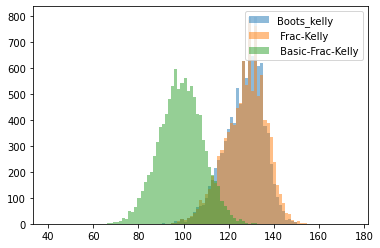

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
bins = np.linspace(40, 175, 100)

plt.hist(money_earned_mean, bins, alpha=0.5, label='Boots_kelly')
plt.hist(money_earned_goodk, bins, alpha=0.5, label=' Frac-Kelly')
plt.hist(money_earned_badk, bins, alpha=0.5, label=' Basic-Frac-Kelly')

plt.legend(loc='upper right')
plt.show()